# Find Best Traces to Evaluate the Results

In [1]:
import os
import glob
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dap.utils import obs_params, load_current
from dap import DAPcython

In [2]:
os.chdir('../')

In [3]:
from utils import calc_features_ramp, calc_features_step, find_spikes

## Load the Data 

In [4]:
data_dir = '/home/alteska/Desktop/LFI_DAP/data/rawData/2015_08_26b.dat'

In [5]:
# calculate DAP
# load the input data
Ir, vr, tr, t_onr, t_offr, dtr = load_current(data_dir, protocol='rampIV', ramp_amp=3.1)
Is, vs, ts, t_ons, t_offs, dts = load_current(data_dir, protocol='IV', ramp_amp=1)

### Run Best Fit for Comparison

In [6]:
### Set up themodel
params, labels = obs_params(reduced_model=True)
dap = DAPcython(-75, params)
U = dap.simulate(dtr, tr, Ir)
U_step = dap.simulate(dts, ts, Is)

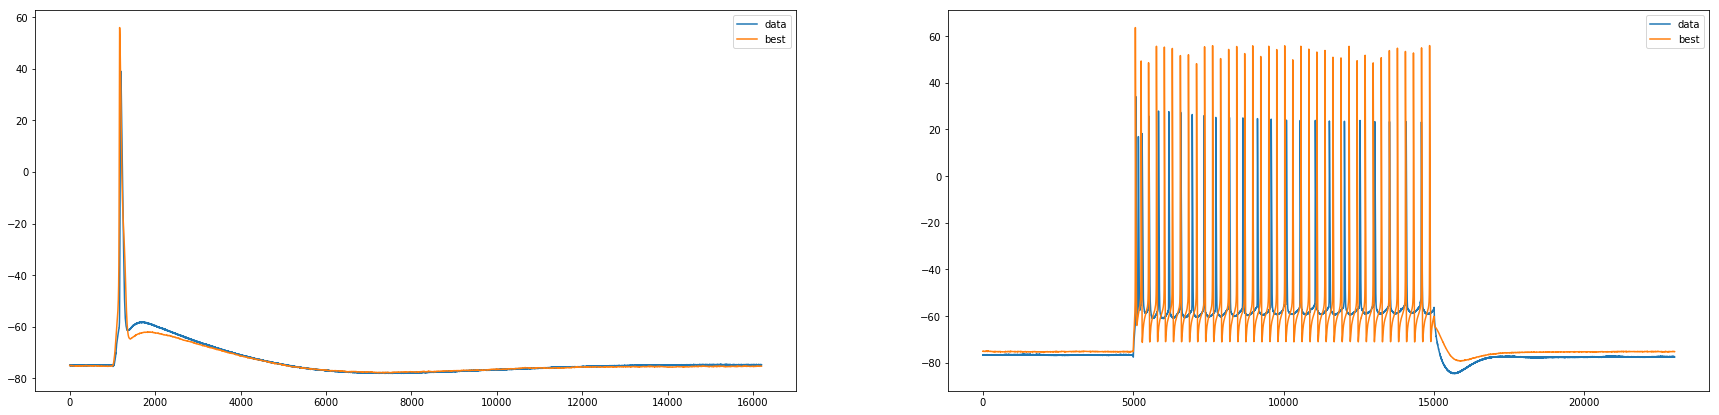

In [7]:
fig, ax  = plt.subplots(ncols=2, figsize=(30,7))
ax[0].plot(vr, label='data')
ax[0].plot(U, label='best')
ax[0].legend();

ax[1].plot(vs, label='data')
ax[1].plot(U_step, label='best');
ax[1].legend();

## Calculate The Features

In [8]:
data_feat_ramp = calc_features_ramp(vr, tr, dtr, t_onr, t_offr)
data_feat_ramp

array([-74.9345 , 113.997  ,   0.73   , -59.96875,  14.21575,  19.73   ,
        -0.75   ,   1.39   , -78.09375])

In [9]:
data_feat_step = calc_features_step(vs, ts, dts, t_ons, t_offs)
data_feat_step

array([-76.63358125, 0.06351057982730121, 48.0, 20.62173913043478,
       6.066798921122928, 24,
       array([254.6 , 258.4 , 264.6 , 275.95, 291.85, 309.  , 328.9 , 347.95,
       367.45, 387.1 , 409.75, 432.15, 456.4 , 479.25, 504.55, 527.35,
       552.55, 575.95, 600.95, 626.85, 651.45, 675.85, 703.5 , 728.9 ])],
      dtype=object)

In [10]:
# load the file
fname = 'dap_models_5_param_1x30.hdf'
# fname = 'dap_models_4_param_1x20.hdf'

df_steps = pd.read_hdf(fname, key='step_features')
df_ramps = pd.read_hdf(fname, key='ramp_features')
df_traces = pd.read_hdf(fname, key='param_traces')

In [11]:
df_traces.index.rename('id', inplace=True)
df_traces.reset_index(level=0, inplace=True)
df_traces.head()

,id,gbar_nap,gbar_leak,gbar_nat,gbar_kdr,gbar_hcn,distance_ramp,distance_step,distance_sum,step_traces,ramp_traces
0,1x6,17.608778,0.999338,79.678240,3.391087,0.051448,888.588117,1970.032738,2858.620855,"[-75.00741605766737, -74.95003969548506, -74.8...","[-75.00783735160118, -74.97437745626856, -74.9..."
1,1x10,15.614517,1.044416,140.417826,3.539281,0.051953,511.563751,2276.209894,2787.773645,"[-74.99419940946575, -75.02823848696148, -75.0...","[-75.01328699897375, -75.028336396094, -75.019..."
2,1x9,17.315070,1.057800,118.918062,3.516548,0.054235,766.810847,2532.620661,3299.431508,"[-75.00002849987123, -74.9800216764795, -74.92...","[-75.01243044755087, -74.97448873625879, -74.9..."
3,1x2,14.175050,1.782692,26.169923,2.169628,0.053212,1202.443532,1871.673447,3074.116979,"[-74.99022425090345, -74.94802028207006, -74.9...","[-74.9879554906601, -74.98881472558149, -74.98..."
4,1x26,17.030042,1.016935,120.070622,3.466972,0.051819,649.356308,2485.605262,3134.961570,"[-74.98764622358885, -74.9725152041406, -74.94...","[-74.99898250803659, -75.0046177908949, -75.01..."


In [12]:
df_steps.head()

,rest_pot,rest_pot_std,firing_rate,ISI_mean,ISI_std,spike_count,spike_times_stim
Unnamed: 0,,,,,,,
1x6,-67.869703,0.026081,2.0,NaN,NaN,1,[252.9]
1x10,-76.193072,0.048743,48.0,21.141304,11.111242,24,"[253.9, 254.0, 277.8, 304.65000000000003, 331...."
1x9,-70.292662,0.032032,60.0,17.068966,0.770066,30,"[252.64999999999998, 265.7, 282.40000000000003..."
1x2,-70.800157,0.037615,2.0,NaN,NaN,1,[257.85]
1x26,-71.620112,0.029392,60.0,16.991379,0.792646,30,"[252.9, 265.75, 282.3, 299.35, 316.5, 333.6, 3..."


In [13]:
df_ramps.head()

,rest_pot,AP_amp,AP_width,fAHP,DAP_amp,DAP_width,DAP_deflection,DAP_time,mAHP
Unnamed: 0,,,,,,,,,
1x6,-73.297934,125.060100,0.73,-63.153430,10.118469,44.99,-0.026035,2.06,-75.007837
1x10,-75.490570,131.172028,0.73,-66.203174,9.204255,13.84,-0.083141,2.16,-79.330272
1x9,-73.699764,128.442765,0.71,-63.691743,9.885066,29.18,-0.122955,2.06,-75.012430
1x2,-74.187485,999.000000,999.00,999.000000,999.000000,999.00,999.000000,999.00,999.000000
1x26,-73.980534,128.790477,0.72,-63.991561,10.008852,27.60,0.019879,2.14,-75.017927


## Feature Comparison Dev

### Ramp Current
0. Drop the 999s? *
1. Get the differenece
2. Create new data frame with differences and a new column for summing them 
3. Reevaluate for step current

In [14]:
x = df_ramps.loc['1x6'].values
x

array([-7.32979336e+01,  1.25060100e+02,  7.30000000e-01, -6.31534301e+01,
        1.01184689e+01,  4.49900000e+01, -2.60346226e-02,  2.06000000e+00,
       -7.50078374e+01])

In [15]:
data_feat_ramp

array([-74.9345 , 113.997  ,   0.73   , -59.96875,  14.21575,  19.73   ,
        -0.75   ,   1.39   , -78.09375])

In [16]:
data_feat_ramp - x

array([ -1.63656639, -11.06309994,   0.        ,   3.1846801 ,
         4.09728111, -25.26      ,  -0.72396538,  -0.67      ,
        -3.08591265])

In [17]:
sum(data_feat_ramp - x)

-35.15758314549992

#### Create a Diff DF

In [18]:
df_diff_ramps = df_ramps.copy() - data_feat_ramp
df_diff_ramps.head()

,rest_pot,AP_amp,AP_width,fAHP,DAP_amp,DAP_width,DAP_deflection,DAP_time,mAHP
Unnamed: 0,,,,,,,,,
1x6,1.636566,11.063100,0.000000e+00,-3.184680,-4.097281,25.26,0.723965,0.67,3.085913
1x10,-0.556070,17.175028,1.776357e-15,-6.234424,-5.011495,-5.89,0.666859,0.77,-1.236522
1x9,1.234736,14.445765,-2.000000e-02,-3.722993,-4.330684,9.45,0.627045,0.67,3.081320
1x2,0.747015,885.003000,9.982700e+02,1058.968750,984.784250,979.27,999.750000,997.61,1077.093750
1x26,0.953966,14.793477,-1.000000e-02,-4.022811,-4.206898,7.87,0.769879,0.75,3.075823


In [19]:
# df_diff_ramps.sum(axis =1)

In [20]:
df_diff_ramps['sum'] = df_diff_ramps.sum(axis=1)
df_diff_ramps['sum'] = np.abs(df_diff_ramps['sum'])

In [21]:
df_diff_ramps.head()

,rest_pot,AP_amp,AP_width,fAHP,DAP_amp,DAP_width,DAP_deflection,DAP_time,mAHP,sum
Unnamed: 0,,,,,,,,,,
1x6,1.636566,11.063100,0.000000e+00,-3.184680,-4.097281,25.26,0.723965,0.67,3.085913,35.157583
1x10,-0.556070,17.175028,1.776357e-15,-6.234424,-5.011495,-5.89,0.666859,0.77,-1.236522,0.316624
1x9,1.234736,14.445765,-2.000000e-02,-3.722993,-4.330684,9.45,0.627045,0.67,3.081320,21.435188
1x2,0.747015,885.003000,9.982700e+02,1058.968750,984.784250,979.27,999.750000,997.61,1077.093750,7981.496765
1x26,0.953966,14.793477,-1.000000e-02,-4.022811,-4.206898,7.87,0.769879,0.75,3.075823,19.973435


#### Sort the New Data Frame

In [22]:
df_diff_ramps.sort_values('sum').head(10)

,rest_pot,AP_amp,AP_width,fAHP,DAP_amp,DAP_width,DAP_deflection,DAP_time,mAHP,sum
Unnamed: 0,,,,,,,,,,
1x27,-0.766385,17.777030,1.000000e-02,-6.477645,-5.106766,-5.82,0.604493,0.85,-1.343948,0.273220
1x34,-0.898074,18.387178,3.000000e-02,-6.821211,-5.190413,-5.44,0.732723,1.00,-1.514189,0.286014
1x10,-0.556070,17.175028,1.776357e-15,-6.234424,-5.011495,-5.89,0.666859,0.77,-1.236522,0.316624
1x31,-0.772616,17.826501,1.000000e-02,-6.865498,-5.534743,-7.42,0.558139,0.82,-1.541060,2.919277
1x21,-0.330223,17.079926,-1.776357e-15,-5.620990,-4.745744,-4.05,0.545023,0.77,-0.442429,3.205563
1x14,0.005104,16.604126,0.000000e+00,-5.804197,-5.172787,-3.72,0.636513,0.83,-0.138945,3.239815
1x15,-0.744660,17.784633,2.000000e-02,-6.040175,-4.540348,-3.68,0.755167,0.92,-1.169368,3.305250
1x24,-1.181664,18.063409,1.000000e-02,-7.253797,-5.334396,-7.62,0.737737,0.79,-2.338107,4.126820
1x33,-0.244982,16.906291,1.000000e-02,-5.269204,-4.394403,-2.03,0.629819,0.81,-0.273946,6.143574


In [23]:
df_ramp_best =  df_diff_ramps[df_diff_ramps['sum'] < 20]
df_ramp_best


,rest_pot,AP_amp,AP_width,fAHP,DAP_amp,DAP_width,DAP_deflection,DAP_time,mAHP,sum
Unnamed: 0,,,,,,,,,,
1x10,-0.556070,17.175028,1.776357e-15,-6.234424,-5.011495,-5.89,0.666859,0.77,-1.236522,0.316624
1x26,0.953966,14.793477,-1.000000e-02,-4.022811,-4.206898,7.87,0.769879,0.75,3.075823,19.973435
1x14,0.005104,16.604126,0.000000e+00,-5.804197,-5.172787,-3.72,0.636513,0.83,-0.138945,3.239815
1x24,-1.181664,18.063409,1.000000e-02,-7.253797,-5.334396,-7.62,0.737737,0.79,-2.338107,4.126820
1x12,0.745170,15.962247,-1.000000e-02,-5.123835,-5.270966,0.42,0.598039,0.77,1.796533,9.887189
1x27,-0.766385,17.777030,1.000000e-02,-6.477645,-5.106766,-5.82,0.604493,0.85,-1.343948,0.273220
1x39,-0.371379,17.372671,4.000000e-02,-4.499558,-3.412013,2.48,0.716166,0.99,-0.113281,13.202606
1x29,-0.682995,18.249137,4.000000e-02,-5.779523,-4.379915,0.11,0.716614,1.14,-0.741237,8.672080
1x31,-0.772616,17.826501,1.000000e-02,-6.865498,-5.534743,-7.42,0.558139,0.82,-1.541060,2.919277


In [24]:
df_ramp_best.index.rename('id', inplace=True)
df_ramp_best.reset_index(level=0, inplace=True)
df_ramp_best

,id,rest_pot,AP_amp,AP_width,fAHP,DAP_amp,DAP_width,DAP_deflection,DAP_time,mAHP,sum
0,1x10,-0.556070,17.175028,1.776357e-15,-6.234424,-5.011495,-5.89,0.666859,0.77,-1.236522,0.316624
1,1x26,0.953966,14.793477,-1.000000e-02,-4.022811,-4.206898,7.87,0.769879,0.75,3.075823,19.973435
2,1x14,0.005104,16.604126,0.000000e+00,-5.804197,-5.172787,-3.72,0.636513,0.83,-0.138945,3.239815
3,1x24,-1.181664,18.063409,1.000000e-02,-7.253797,-5.334396,-7.62,0.737737,0.79,-2.338107,4.126820
4,1x12,0.745170,15.962247,-1.000000e-02,-5.123835,-5.270966,0.42,0.598039,0.77,1.796533,9.887189
5,1x27,-0.766385,17.777030,1.000000e-02,-6.477645,-5.106766,-5.82,0.604493,0.85,-1.343948,0.273220
6,1x39,-0.371379,17.372671,4.000000e-02,-4.499558,-3.412013,2.48,0.716166,0.99,-0.113281,13.202606
7,1x29,-0.682995,18.249137,4.000000e-02,-5.779523,-4.379915,0.11,0.716614,1.14,-0.741237,8.672080
8,1x31,-0.772616,17.826501,1.000000e-02,-6.865498,-5.534743,-7.42,0.558139,0.82,-1.541060,2.919277
9,1x32,0.918232,15.363755,-1.000000e-02,-4.594775,-4.898669,1.52,0.614338,0.64,2.336389,11.889271


In [25]:
df_best_ramp_tr = pd.merge(df_traces, df_ramp_best)
df_best_ramp_tr.head()

,id,gbar_nap,gbar_leak,gbar_nat,gbar_kdr,gbar_hcn,distance_ramp,distance_step,distance_sum,step_traces,...,rest_pot,AP_amp,AP_width,fAHP,DAP_amp,DAP_width,DAP_deflection,DAP_time,mAHP,sum
0,1x10,15.614517,1.044416,140.417826,3.539281,0.051953,511.563751,2276.209894,2787.773645,"[-74.99419940946575, -75.02823848696148, -75.0...",...,-0.556070,17.175028,1.776357e-15,-6.234424,-5.011495,-5.89,0.666859,0.77,-1.236522,0.316624
1,1x26,17.030042,1.016935,120.070622,3.466972,0.051819,649.356308,2485.605262,3134.961570,"[-74.98764622358885, -74.9725152041406, -74.94...",...,0.953966,14.793477,-1.000000e-02,-4.022811,-4.206898,7.87,0.769879,0.75,3.075823,19.973435
2,1x14,16.466313,1.048992,141.987835,3.659247,0.051875,548.892893,2282.000459,2830.893352,"[-74.99105526542137, -74.99585885716084, -74.9...",...,0.005104,16.604126,0.000000e+00,-5.804197,-5.172787,-3.72,0.636513,0.83,-0.138945,3.239815
3,1x24,15.139225,1.077679,149.834404,3.570745,0.051368,578.999429,2267.459632,2846.459061,"[-75.00364017542788, -75.0524415193095, -75.07...",...,-1.181664,18.063409,1.000000e-02,-7.253797,-5.334396,-7.62,0.737737,0.79,-2.338107,4.126820
4,1x12,16.996657,1.080635,146.054085,3.667232,0.055762,664.000907,2409.570659,3073.571566,"[-74.9996826418957, -74.9796083480469, -74.951...",...,0.745170,15.962247,-1.000000e-02,-5.123835,-5.270966,0.42,0.598039,0.77,1.796533,9.887189


In [26]:
y = df_traces.loc[df_traces['id'] == '1x27'].ramp_traces.values
y1 = df_traces.loc[df_traces['id'] == '1x34'].ramp_traces.values

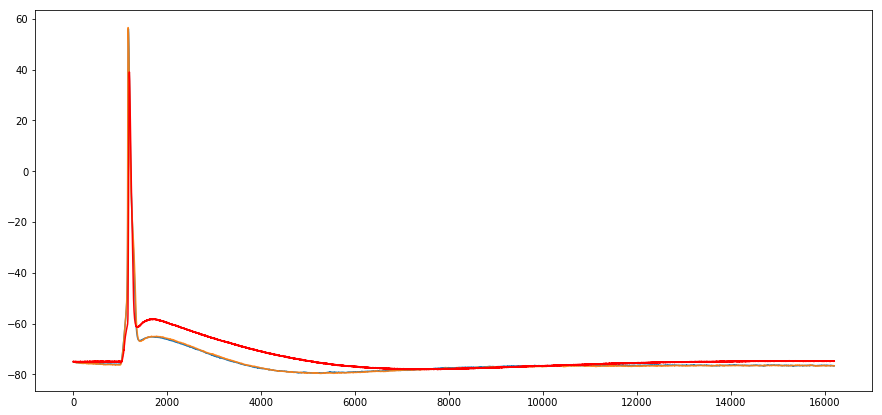

In [27]:
plt.figure(figsize=(15,7))
plt.plot(y[0])
plt.plot(y1[0], alpha=0.9)
plt.plot(vr, c='r');

In [28]:
traces_ramp = df_best_ramp_tr.ramp_traces
traces_step = df_best_ramp_tr.step_traces
ids = df_best_ramp_tr.id

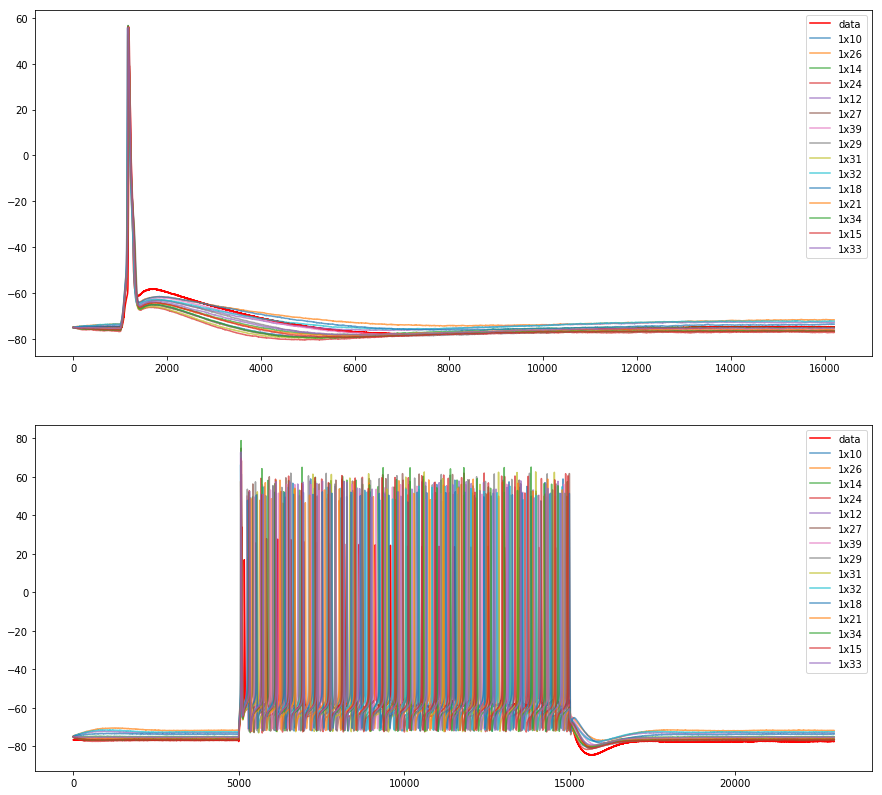

In [29]:
fig, ax = plt.subplots(nrows=2, figsize=(15, 14))

ax[0].plot(vr, c='r', label='data');
ax[1].plot(vs, c='r', label='data');

for i, tr in enumerate(traces_ramp): 
    n = ids[i]b
    ax[0].plot(tr, alpha=0.7, label=n)

for i, tr in enumerate(traces_step): 
    n = ids[i]
    ax[1].plot(tr, alpha=0.7, label=n)
    
ax[0].legend()
ax[1].legend();



In [30]:
df_steps.head()

,rest_pot,rest_pot_std,firing_rate,ISI_mean,ISI_std,spike_count,spike_times_stim
Unnamed: 0,,,,,,,
1x6,-67.869703,0.026081,2.0,NaN,NaN,1,[252.9]
1x10,-76.193072,0.048743,48.0,21.141304,11.111242,24,"[253.9, 254.0, 277.8, 304.65000000000003, 331...."
1x9,-70.292662,0.032032,60.0,17.068966,0.770066,30,"[252.64999999999998, 265.7, 282.40000000000003..."
1x2,-70.800157,0.037615,2.0,NaN,NaN,1,[257.85]
1x26,-71.620112,0.029392,60.0,16.991379,0.792646,30,"[252.9, 265.75, 282.3, 299.35, 316.5, 333.6, 3..."


In [31]:
df_steps.dropna().sort_values('spike_count')

,rest_pot,rest_pot_std,firing_rate,ISI_mean,ISI_std,spike_count,spike_times_stim
Unnamed: 0,,,,,,,
1x10,-76.193072,0.048743,48.0,21.141304,11.111242,24,"[253.9, 254.0, 277.8, 304.65000000000003, 331...."
1x32,-72.427217,0.037737,54.0,18.696154,3.880893,27,"[252.9, 253.0, 266.95000000000005, 286.05, 305..."
1x9,-70.292662,0.032032,60.0,17.068966,0.770066,30,"[252.64999999999998, 265.7, 282.40000000000003..."
1x26,-71.620112,0.029392,60.0,16.991379,0.792646,30,"[252.9, 265.75, 282.3, 299.35, 316.5, 333.6, 3..."
1x24,-77.057136,0.037534,60.0,16.900000,15.145126,30,"[254.05, 254.14999999999998, 283.55, 283.65000..."
1x21,-75.609817,0.039433,66.0,15.168750,10.253412,33,"[253.64999999999998, 253.75000000000003, 268.1..."
1x11,-68.124272,0.056521,66.0,15.292188,2.793802,33,"[252.14999999999998, 252.25000000000003, 264.7..."
1x33,-75.283975,0.045616,66.0,15.125000,8.778970,33,"[253.55, 253.64999999999998, 266.35, 286.4, 30..."
1x31,-76.273849,0.036271,66.0,14.792188,13.815860,33,"[253.75000000000003, 253.85000000000002, 278.1..."


In [32]:
y = df_traces.loc[df_traces['id'] == '1x10'].ramp_traces.values
y1 = df_traces.loc[df_traces['id'] == '1x32'].ramp_traces.values

y_step = df_traces.loc[df_traces['id'] == '1x10'].step_traces.values
y1_step = df_traces.loc[df_traces['id'] == '1x32'].step_traces.values

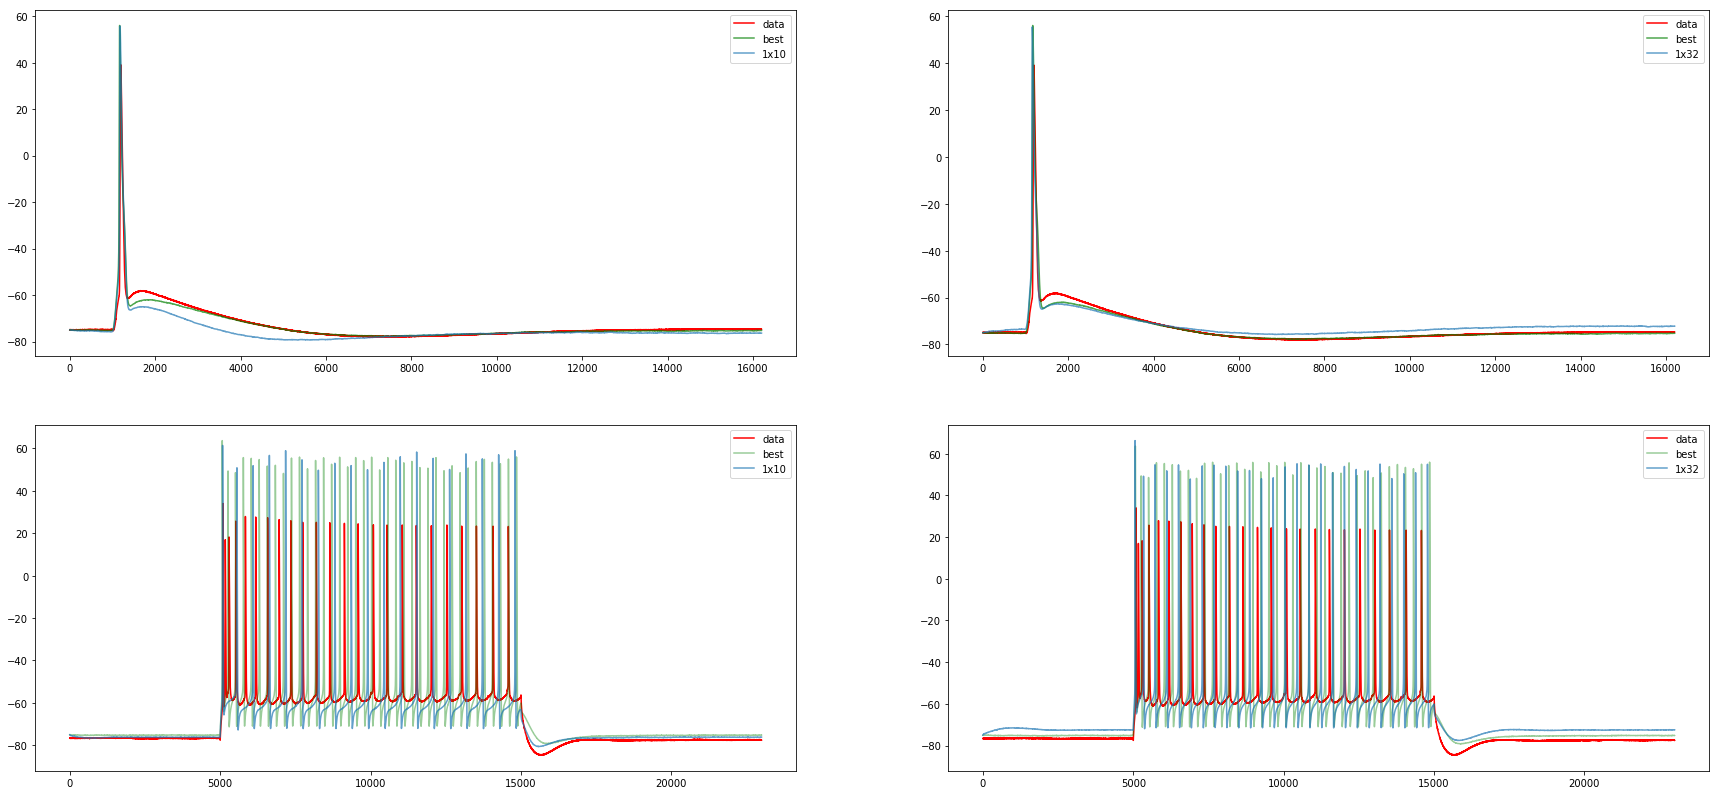

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30, 14))

ax[0][0].plot(vr, c='r', label='data');
ax[0][0].plot(U, c='g', alpha=0.7, label='best')
ax[0][1].plot(vr, c='r', label='data');
ax[0][1].plot(U, c='g', alpha=0.7, label='best')

ax[1][0].plot(vs, c='r', label='data');
ax[1][0].plot(U_step, c='g', alpha=0.4, label='best');
ax[1][1].plot(vs, c='r', label='data');
ax[1][1].plot(U_step, c='g', alpha=0.4, label='best');

ax[0][0].plot(y[0], alpha=0.7, label='1x10')
ax[0][1].plot(y1[0], alpha=0.7, label='1x32')

ax[1][0].plot(y_step[0], alpha=0.7, label='1x10')
ax[1][1].plot(y1_step[0], alpha=0.7, label='1x32')
    
ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend();
ax[1][1].legend();



In [34]:
y = df_traces.loc[df_traces['id'] == '1x9'].ramp_traces.values
y1 = df_traces.loc[df_traces['id'] == '1x26'].ramp_traces.values

y_step = df_traces.loc[df_traces['id'] == '1x9'].step_traces.values
y1_step = df_traces.loc[df_traces['id'] == '1x26'].step_traces.values

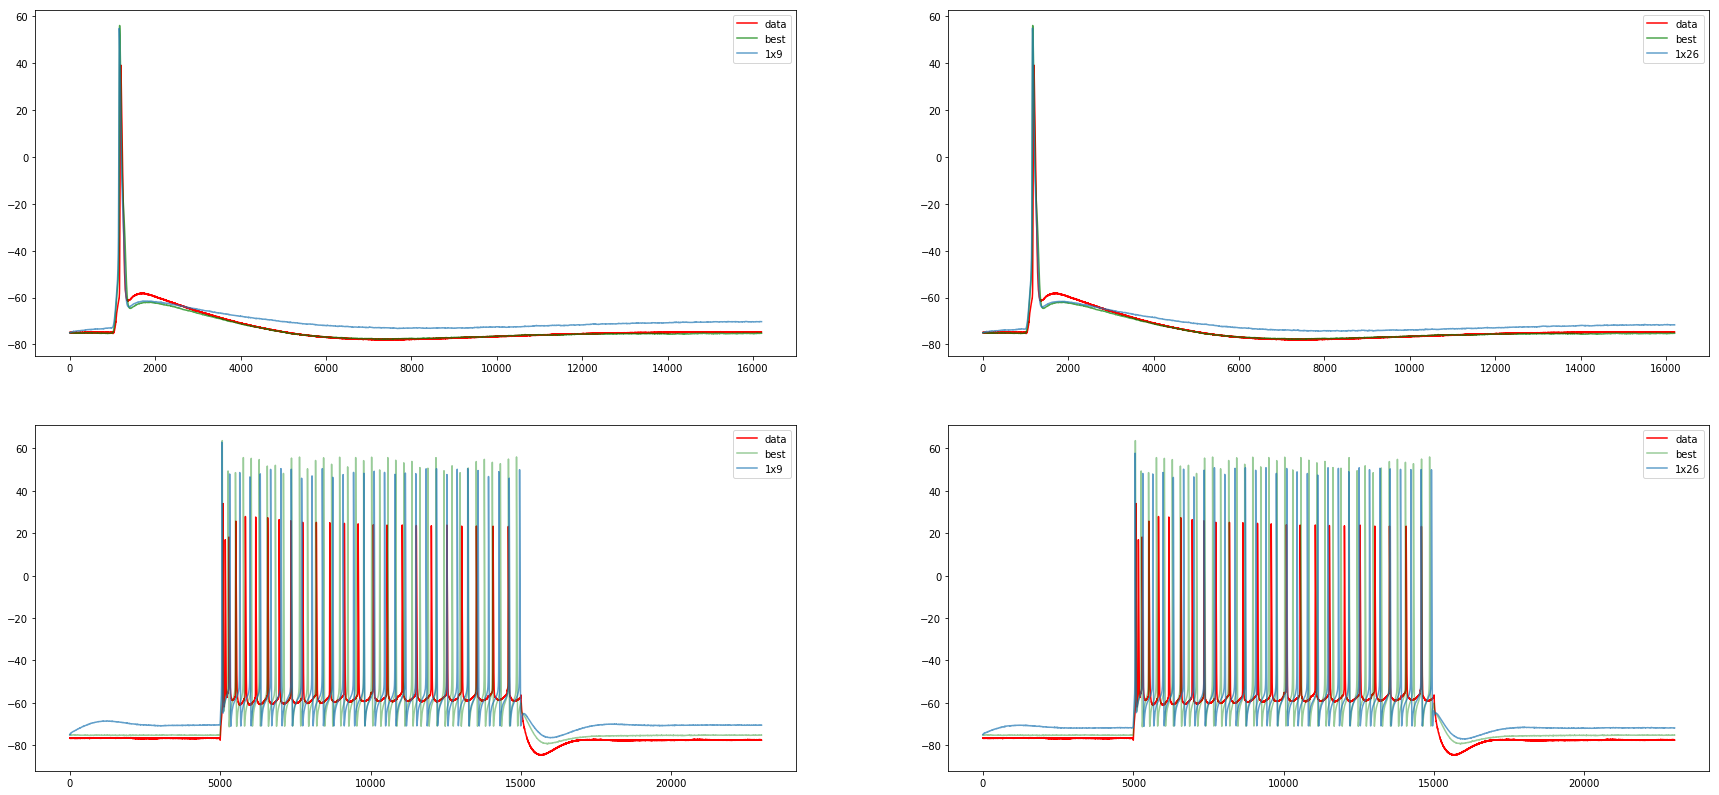

In [46]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30, 14))

ax[0][0].plot(vr, c='r', label='data');
ax[0][0].plot(U, c='g', alpha=0.7, label='best')
ax[0][1].plot(vr, c='r', label='data');
ax[0][1].plot(U, c='g', alpha=0.7, label='best')

ax[1][0].plot(vs, c='r', label='data');
ax[1][0].plot(U_step, c='g', alpha=0.4, label='best');
ax[1][1].plot(vs, c='r', label='data');
ax[1][1].plot(U_step, c='g', alpha=0.4, label='best');

ax[0][0].plot(y[0], alpha=0.7, label='1x9')
ax[0][1].plot(y1[0], alpha=0.7, label='1x26')

ax[1][0].plot(y_step[0], alpha=0.7, label='1x9')
ax[1][1].plot(y1_step[0], alpha=0.7, label='1x26')
    
ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend();
ax[1][1].legend();


### Step Current
0. Get the Naan's (single spike out)
1. What about ISI?
2. Get the differeneces?


In [36]:
df_steps.head()

,rest_pot,rest_pot_std,firing_rate,ISI_mean,ISI_std,spike_count,spike_times_stim
Unnamed: 0,,,,,,,
1x6,-67.869703,0.026081,2.0,NaN,NaN,1,[252.9]
1x10,-76.193072,0.048743,48.0,21.141304,11.111242,24,"[253.9, 254.0, 277.8, 304.65000000000003, 331...."
1x9,-70.292662,0.032032,60.0,17.068966,0.770066,30,"[252.64999999999998, 265.7, 282.40000000000003..."
1x2,-70.800157,0.037615,2.0,NaN,NaN,1,[257.85]
1x26,-71.620112,0.029392,60.0,16.991379,0.792646,30,"[252.9, 265.75, 282.3, 299.35, 316.5, 333.6, 3..."


In [37]:
data_feat_step[:-1]

array([-76.63358125, 0.06351057982730121, 48.0, 20.62173913043478,
       6.066798921122928, 24], dtype=object)

In [41]:
df_steps.dropna(inplace=True)
df_steps.drop('spike_times_stim', axis=1, inplace=True)

In [42]:
df_steps

,rest_pot,rest_pot_std,firing_rate,ISI_mean,ISI_std,spike_count
Unnamed: 0,,,,,,
1x10,-76.193072,0.048743,48.0,21.141304,11.111242,24
1x9,-70.292662,0.032032,60.0,17.068966,0.770066,30
1x26,-71.620112,0.029392,60.0,16.991379,0.792646,30
1x14,-74.972203,0.034598,68.0,14.945455,11.274981,34
1x24,-77.057136,0.037534,60.0,16.900000,15.145126,30
1x12,-72.934855,0.031086,90.0,10.903409,9.039964,45
1x28,-64.565847,0.078776,102.0,9.836000,1.397928,51
1x27,-76.280691,0.028736,74.0,13.779167,12.298489,37
1x39,-75.717975,0.035665,110.0,9.029630,5.304344,55


In [39]:
df_best_step = df_steps.copy() - data_feat_step[:-1]
df_best_step
# df_best_step.sort_values('spike_count')

,rest_pot,rest_pot_std,firing_rate,ISI_mean,ISI_std,spike_count
Unnamed: 0,,,,,,
1x10,0.440510,-0.014768,0.0,0.519565,5.044443,0
1x9,6.340919,-0.031479,12.0,-3.552774,-5.296732,6
1x26,5.013470,-0.034119,12.0,-3.630360,-5.274153,6
1x14,1.661378,-0.028913,20.0,-5.676285,5.208183,10
1x24,-0.423555,-0.025976,12.0,-3.721739,9.078327,6
1x12,3.698726,-0.032424,42.0,-9.718330,2.973165,21
1x28,12.067734,0.015265,54.0,-10.785739,-4.668870,27
1x27,0.352891,-0.034775,26.0,-6.842572,6.231690,13
1x39,0.915607,-0.027846,62.0,-11.592110,-0.762455,31


In [43]:
df_best_step['sum'] = df_best_step.drop('spike_count', axis=1).sum(axis=1)
df_best_step.sort_values('spike_count')

,rest_pot,rest_pot_std,firing_rate,ISI_mean,ISI_std,spike_count,sum
Unnamed: 0,,,,,,,
1x10,0.440510,-0.014768,0.0,0.519565,5.044443,0,5.989750
1x32,4.206364,-0.025773,6.0,-1.925585,-2.185906,3,6.069100
1x9,6.340919,-0.031479,12.0,-3.552774,-5.296732,6,9.459934
1x26,5.013470,-0.034119,12.0,-3.630360,-5.274153,6,8.074838
1x24,-0.423555,-0.025976,12.0,-3.721739,9.078327,6,16.907057
1x21,1.023764,-0.024078,18.0,-5.452989,4.186613,9,17.733311
1x11,8.509309,-0.006990,18.0,-5.329552,-3.272997,9,17.899771
1x33,1.349606,-0.017894,18.0,-5.496739,2.712171,9,16.547144
1x31,0.359733,-0.027240,18.0,-5.829552,7.749061,9,20.252002
